In [1]:
require 'torch';
require 'image';
require 'nn';
torch.manualSeed(1234)

l = image.lena();
l = image.scale(l,100);
l = torch.reshape(l,l:size()[1],l:size()[2]*l:size()[3])

K = 10;
N = l:size()[2];
r = torch.zeros(N,K);

--muindices = (torch.rand(K)*N):int():long();
muindices = torch.randperm(N):long()[{{1,K}}];
mu = l:index(2,muindices);

In [2]:
for iter=1,10 do
    -- E-step
    for i=1,N do
        minidx = 1;
        mindist = torch.dist(l[{{1},{i}}],mu[{{1},{1}}]);
        for j=2,K do
            dist = torch.dist(l[{{},{i}}],mu[{{},{j}}]);
            if dist < mindist then
                mindist = dist;
                minidx = j;
            end
        end
        r[i][minidx] = 1;
    end
    -- M-step
    for i=1,K do
        num = mu[{{},{i}}]*r[1][i];
        for j=2,N do
            num = num + mu[{{},{i}}]*r[j][i];
        end
        mu[{{},{i}}] = num / r[{{},{K}}]:sum();
    end
end

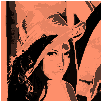

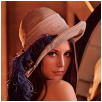

In [3]:
lcopy = mu*nn.Transpose({1,2})(r);
itorch.image({torch.reshape(lcopy,l:size()[1],torch.sqrt(N),torch.sqrt(N))})
itorch.image({torch.reshape(l,l:size()[1],torch.sqrt(N),torch.sqrt(N))})